In [465]:
from fastai import *
from fastai.vision import *
from fastai.core import *

In [466]:
path = Path('imgs')

In [467]:
data = ImageDataBunch.from_folder(path, test='test', ds_tfms=get_transforms(), size=224, bs=18)

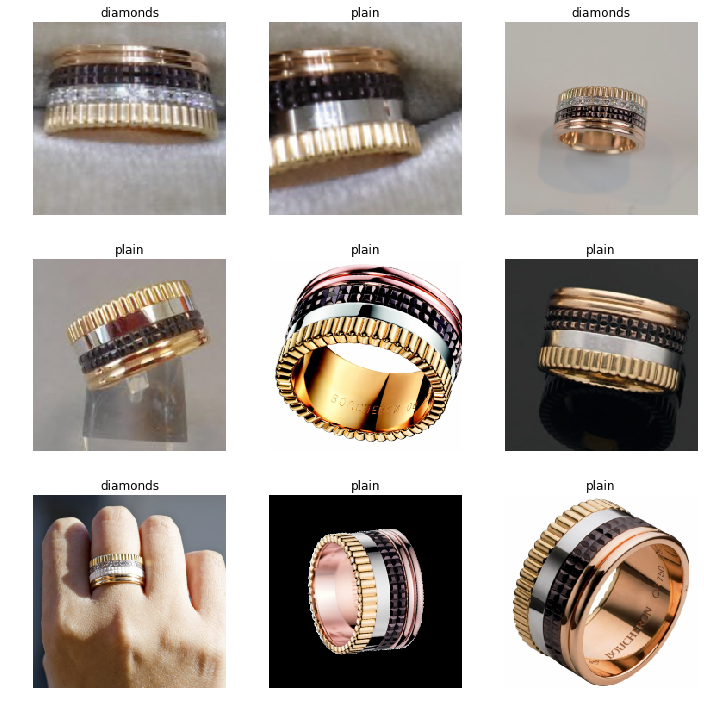

In [468]:
data.show_batch(rows=3, figsize=(10,10))

In [469]:
#models.__dict__

In [470]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [471]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.634200,0.980126,0.500000


In [472]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

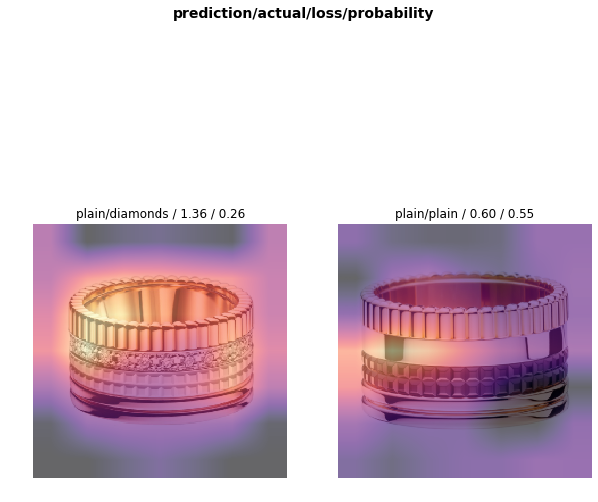

In [473]:
interp.plot_top_losses(2, figsize=(10,10))

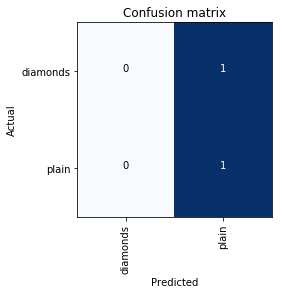

In [474]:
interp.plot_confusion_matrix()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


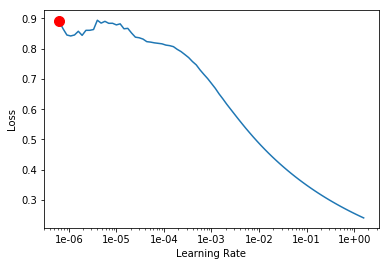

In [475]:
learn.lr_find()
learn.recorder.plot()

In [476]:
preds,y = learn.get_preds(ds_type=DatasetType.Test)

In [477]:
#prints the classes
data.train_dl.dl.dataset.y.classes

['diamonds', 'plain']

In [478]:
#prints the order of the pictures to compare with the predictions array
data.test_dl.dl.x.items

array([PosixPath('imgs/test/plain_test5.jpg'), PosixPath('imgs/test/plain_test6.jpg'),
       PosixPath('imgs/test/plain_test2.jpg'), PosixPath('imgs/test/diamonds_test4.jpg'),
       PosixPath('imgs/test/diamonds_test7.jpg'), PosixPath('imgs/test/diamonds_test.jpg')], dtype=object)

In [479]:
preds

tensor([[0.3982, 0.6018],
        [0.3523, 0.6477],
        [0.4709, 0.5291],
        [0.7897, 0.2103],
        [0.1138, 0.8862],
        [0.6750, 0.3250]])

In [480]:
np.argmax(preds, axis=1)

tensor([1, 1, 1, 0, 1, 0])

In [481]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-1,5e-1))

epoch,train_loss,valid_loss,accuracy
1,0.965232,3911.196289,0.500000
2,0.973963,121363525175936901185536.000000,0.500000
3,2.277395,1476220527257243299862886219776.000000,0.500000
4,11.756101,1286267852427352685957611520.000000,0.500000
5,17.061703,69148748065716305920.000000,0.500000
6,15.587937,120319884918784.000000,0.500000
7,15.112008,42537691643904.000000,0.500000
8,13.621728,266321854464.000000,0.500000
9,13.088876,6302919680.000000,0.500000
10,12.419186,167577920.000000,0.500000


In [482]:
preds,y = learn.get_preds(ds_type=DatasetType.Test)

In [483]:
data.test_dl.dl.x.items

array([PosixPath('imgs/test/plain_test5.jpg'), PosixPath('imgs/test/plain_test6.jpg'),
       PosixPath('imgs/test/plain_test2.jpg'), PosixPath('imgs/test/diamonds_test4.jpg'),
       PosixPath('imgs/test/diamonds_test7.jpg'), PosixPath('imgs/test/diamonds_test.jpg')], dtype=object)

In [484]:
data.train_dl.dl.dataset.y.classes

['diamonds', 'plain']

In [485]:
np.argmax(preds, axis=1)

tensor([1, 1, 1, 1, 1, 1])

In [486]:
preds

tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])

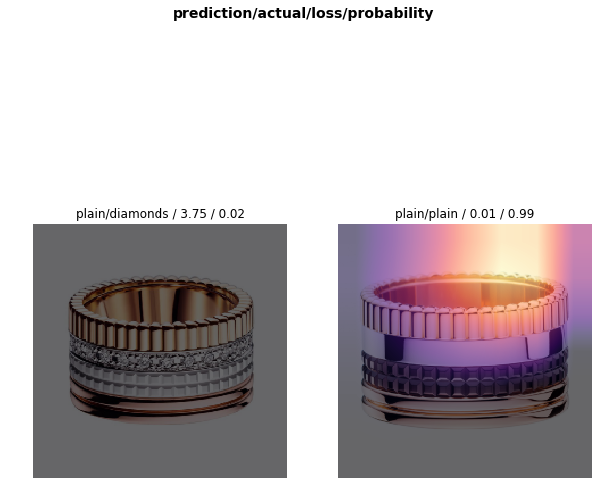

In [429]:
interp.plot_top_losses(2, figsize=(10,10))